<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S6_C3_RegLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Nos permite generar datos artificiales de clasificación
from sklearn.datasets import make_classification

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, ConfusionMatrixDisplay, recall_score, f1_score, confusion_matrix, classification_report

In [33]:
from sklearn.linear_model import LogisticRegression

#1. Datos

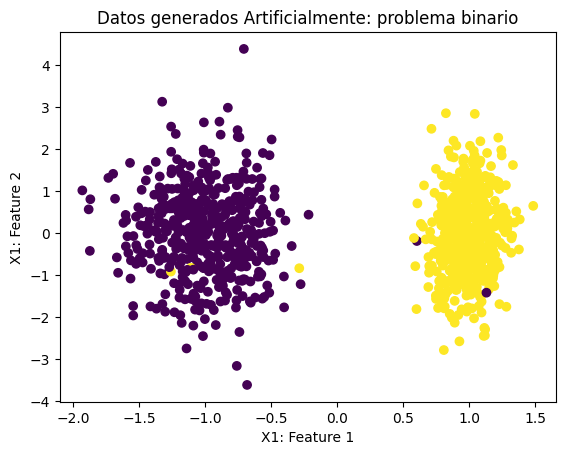

In [34]:
# Parametros
X, Y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
plt.scatter(X[:,0], X[:,1], marker='o', c= Y)
# X1[:,0] la columna 1 de X
# X2[:,2] la columna 2 de X
plt.xlabel('X1: Feature 1')
plt.ylabel('X1: Feature 2')
plt.title('Datos generados Artificialmente: problema binario')
plt.show()


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [36]:
model_regLog = LogisticRegression() # se asigna el modelo de entrenamiento a una variable

In [37]:
model_regLog.fit(X_train, Y_train)# se entrena con los parametros de entrenamiento

LogisticRegression()

In [38]:
print(f'Coeficientes de modelo: {model_regLog.coef_}')
print(f'Intercepto: {model_regLog.intercept_}')

Coeficientes de modelo: [[ 4.86989857 -0.09670186]]
Intercepto: [-0.18027856]


In [39]:
y_predict = model_regLog.predict(X_test)

In [40]:
accuracy = accuracy_score(Y_test, y_predict)
presicion = precision_score(Y_test, y_predict)
recall = recall_score(Y_test, y_predict)
f1 = f1_score(Y_test, y_predict)

In [41]:
print(f'Accuracy: {accuracy}')
#print(f'precison: {presicion}')
print(f'recall: {recall}')
#print(f'f1: {f1}')

Accuracy: 0.985
recall: 0.9906542056074766


In [42]:
confMatrix = confusion_matrix(Y_test, y_predict)
print(confMatrix)

[[ 91   2]
 [  1 106]]


Text(8.222222222222223, 0.5, 'Valores reales')

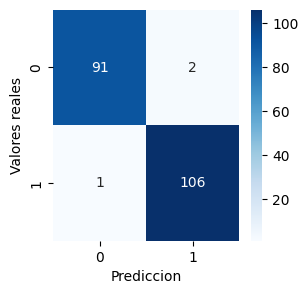

In [43]:
plt.figure(figsize=(3,3))
sns.heatmap(confMatrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediccion')
plt.ylabel('Valores reales')


<Figure size 300x300 with 0 Axes>

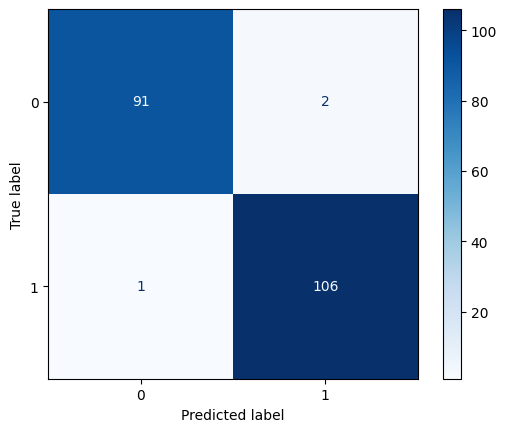

In [44]:
plt.figure(figsize=(3,3))
matrix = ConfusionMatrixDisplay(confusion_matrix=confMatrix)
matrix.plot(cmap='Blues')
plt.show()

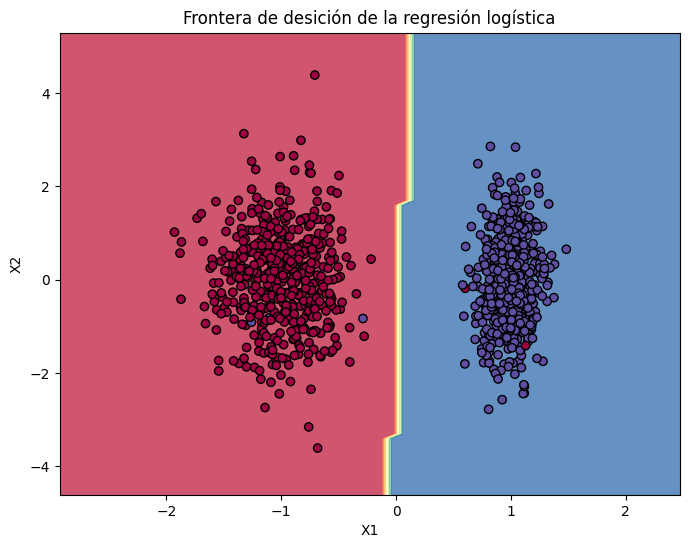

In [49]:
# visualizacion de la forntera de desición

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy= np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = model_regLog.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', marker="o", cmap=plt.cm.Spectral)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Frontera de desición de la regresión logística')
plt.show()

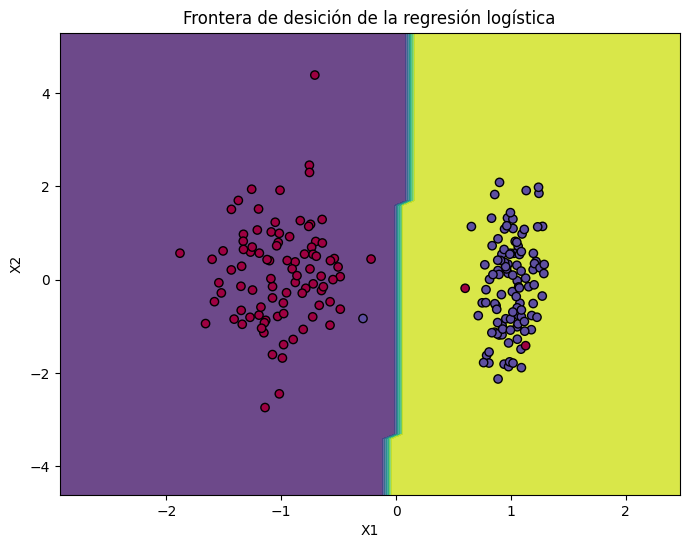

In [53]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.viridis)

plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', marker="o", cmap=plt.cm.Spectral)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Frontera de desición de la regresión logística')
plt.show()